In [2]:
import pandas as pd
import io

# O nome do arquivo pode ser um pouco diferente. Ajuste se necessário.
# Exemplo: 'EPL_matches_2000_to_2025.csv'
file_name = 'epl_final.csv'

df = pd.read_csv(file_name)

print("Dataset carregado com sucesso!")

Dataset carregado com sucesso!


In [3]:
# Mostra todos os nomes de coluna do DataFrame
print(df.columns)

Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')


In [4]:
# --- Bloco 1 (Corrigido): Seleção de Colunas Essenciais ---
# Usando os nomes exatos do seu arquivo e incluindo as estatísticas da partida.
colunas_essenciais = [
    'Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
    'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
    'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
    'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
    'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
    'HomeRedCards', 'AwayRedCards'
]

df_essencial = df[colunas_essenciais].copy()

# --- Bloco 2 (Corrigido): Conversão da Coluna de Data ---
# Corrigindo 'Date' para 'MatchDate'
df_essencial['MatchDate'] = pd.to_datetime(df_essencial['MatchDate'], dayfirst=True, errors='coerce')

# --- Bloco 3 (Inalterado): Filtrando Apenas Jogos do Tottenham ---
nome_time = 'Tottenham'
df_spurs = df_essencial[
    (df_essencial['HomeTeam'] == nome_time) |
    (df_essencial['AwayTeam'] == nome_time)
].copy()

# Renomeando a coluna de data para facilitar o acesso
df_spurs = df_spurs.rename(columns={'MatchDate': 'Date'})

# Ordenamos por data para garantir uma ordem cronológica
df_spurs = df_spurs.sort_values(by='Date', ascending=True).reset_index(drop=True)


# --- Bloco 4: Célula de verificação final ---
print("--- Verificação Final do Dataset do Tottenham ---")
df_spurs.info()
print("\n--- Primeiras 5 partidas do Tottenham no dataset ---")
print(df_spurs.head())
print("\n--- Últimas 5 partidas do Tottenham no dataset ---")
print(df_spurs.tail())

--- Verificação Final do Dataset do Tottenham ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Season             938 non-null    object        
 1   Date               938 non-null    datetime64[ns]
 2   HomeTeam           938 non-null    object        
 3   AwayTeam           938 non-null    object        
 4   FullTimeHomeGoals  938 non-null    int64         
 5   FullTimeAwayGoals  938 non-null    int64         
 6   FullTimeResult     938 non-null    object        
 7   HalfTimeHomeGoals  938 non-null    int64         
 8   HalfTimeAwayGoals  938 non-null    int64         
 9   HalfTimeResult     938 non-null    object        
 10  HomeShots          938 non-null    int64         
 11  AwayShots          938 non-null    int64         
 12  HomeShotsOnTarget  938 non-null    int64         
 13  AwayShotsOnTarg

/tmp/ipython-input-3379583383.py:16: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_essencial['MatchDate'] = pd.to_datetime(df_essencial['MatchDate'], dayfirst=True, errors='coerce')


--- Desempenho Geral do Tottenham (2000-2025) ---
Resultado
Vitoria    440
Derrota    292
Empate     206
Name: count, dtype: int64


/tmp/ipython-input-3154773533.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desempenho_geral.index, y=desempenho_geral.values, ax=ax, palette='viridis')


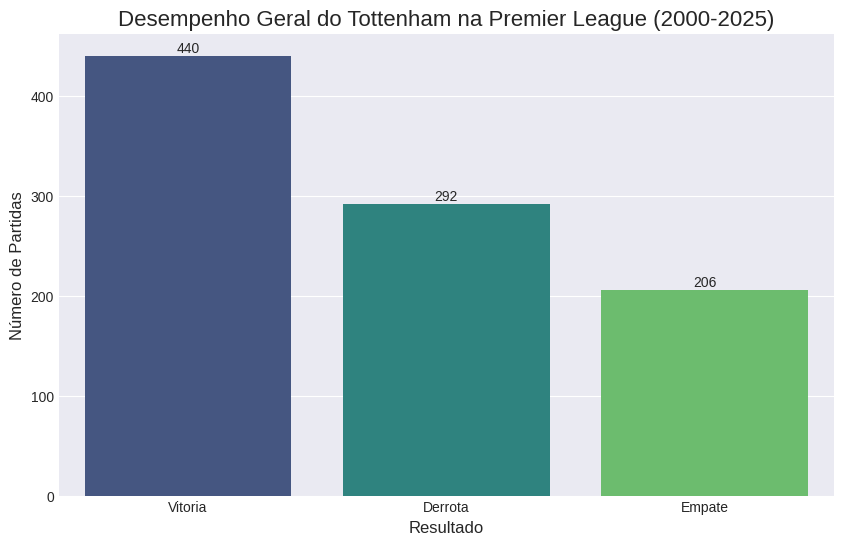

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Bloco 1: Engenharia de Atributos (Feature Engineering) ---
# Vamos criar uma coluna 'Resultado' para o Tottenham (Vitoria, Empate, Derrota)

# Condições para a vitória do Tottenham
condicao_vitoria = (
    (df_spurs['HomeTeam'] == 'Tottenham') & (df_spurs['FullTimeResult'] == 'H') |
    (df_spurs['AwayTeam'] == 'Tottenham') & (df_spurs['FullTimeResult'] == 'A')
)

# Condição para o empate
condicao_empate = (df_spurs['FullTimeResult'] == 'D')

# Usamos np.select para criar a nova coluna de forma eficiente
df_spurs['Resultado'] = np.select(
    [condicao_vitoria, condicao_empate],
    ['Vitoria', 'Empate'],
    default='Derrota' # Se não for vitória nem empate, foi derrota
)


# --- Bloco 2: Primeira Análise - Desempenho Geral ---
# Agora que temos a coluna 'Resultado', podemos facilmente contar o desempenho geral.
desempenho_geral = df_spurs['Resultado'].value_counts()

print("--- Desempenho Geral do Tottenham (2000-2025) ---")
print(desempenho_geral)


# --- Bloco 3: Primeira Visualização - Gráfico de Desempenho ---
# Um bom projeto de portfólio sempre tem visuais claros.
plt.style.use('seaborn-v0_8-darkgrid') # Estilo do gráfico
fig, ax = plt.subplots(figsize=(10, 6)) # Tamanho da figura

# Criando o gráfico de barras
sns.barplot(x=desempenho_geral.index, y=desempenho_geral.values, ax=ax, palette='viridis')

# Adicionando títulos e rótulos
ax.set_title('Desempenho Geral do Tottenham na Premier League (2000-2025)', fontsize=16)
ax.set_xlabel('Resultado', fontsize=12)
ax.set_ylabel('Número de Partidas', fontsize=12)

# Adicionando os números no topo de cada barra para clareza
for i in ax.containers:
    ax.bar_label(i,)

# Mostrando o gráfico
plt.show()

--- Desempenho Temporada a Temporada ---
Resultado  Derrota  Empate  Vitoria  TotalJogos  TaxaDeVitorias
Season                                                         
2000/01         15      10       13          38           34.21
2001/02         16       8       14          38           36.84
2002/03         16       8       14          38           36.84
2003/04         16       5       12          33           36.36
2004/05         12       9       13          34           38.24
2005/06          9      11       18          38           47.37
2006/07         12       9       17          38           44.74
2007/08         14      13       11          38           28.95
2008/09         15       9       14          38           36.84
2009/10         10       7       21          38           55.26
2010/11          8      14       16          38           42.11
2011/12          9       9       20          38           52.63
2012/13          8       9       21          38           55.26

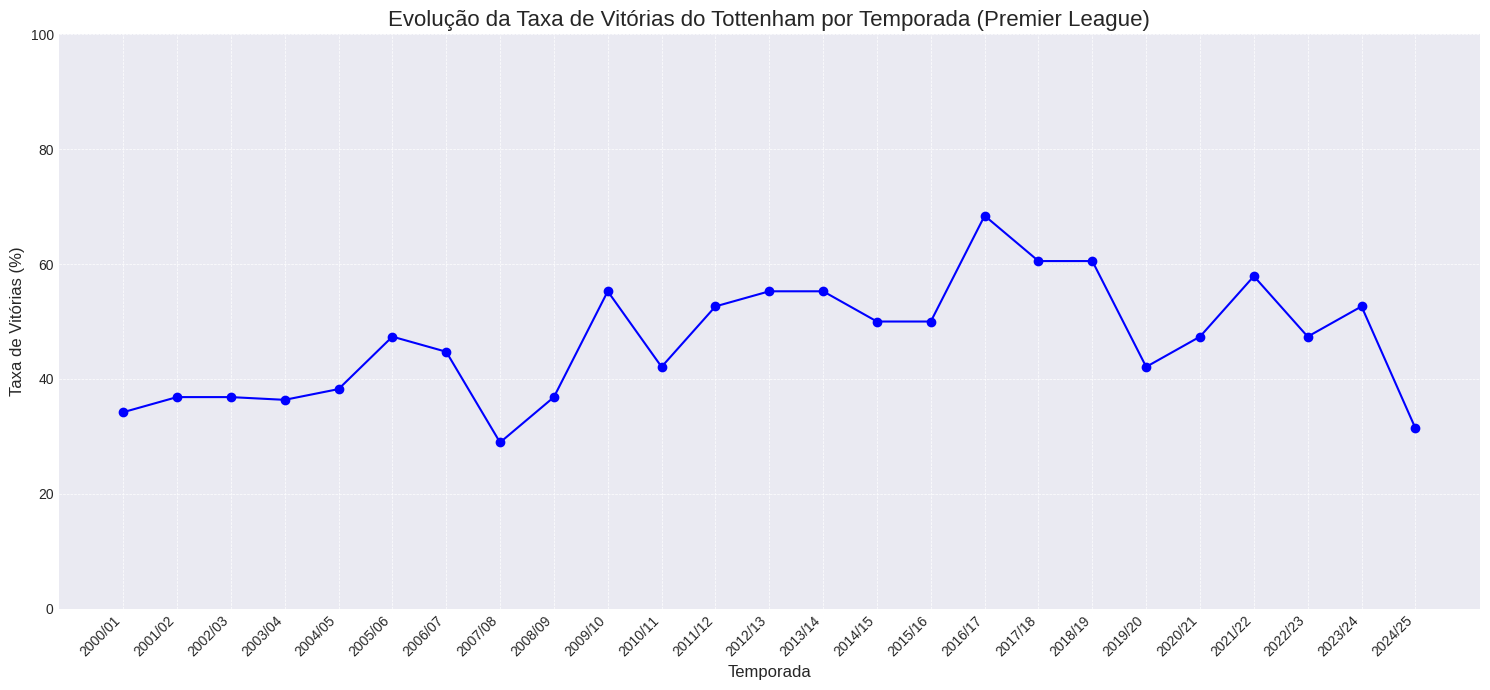

In [6]:
# --- Bloco 1: Agrupando Resultados por Temporada ---
# Vamos agrupar nosso dataframe por 'Season' e contar os resultados em cada uma.
# O .unstack(fill_value=0) transforma o resultado em uma tabela limpa.
desempenho_por_temporada = df_spurs.groupby('Season')['Resultado'].value_counts().unstack(fill_value=0)

# Adicionando uma coluna de total de jogos para calcular as taxas
desempenho_por_temporada['TotalJogos'] = desempenho_por_temporada.sum(axis=1)

# Adicionando a coluna mais importante: a Taxa de Vitórias
desempenho_por_temporada['TaxaDeVitorias'] = (desempenho_por_temporada['Vitoria'] / desempenho_por_temporada['TotalJogos']) * 100

print("--- Desempenho Temporada a Temporada ---")
# Usamos .round(2) para arredondar a taxa de vitórias para 2 casas decimais
print(desempenho_por_temporada.round(2))


# --- Bloco 2: Visualizando a Evolução da Taxa de Vitórias ---
# Gráficos de linha são perfeitos para mostrar tendências ao longo do tempo.
fig, ax = plt.subplots(figsize=(15, 7))

# Plotando a taxa de vitórias
ax.plot(desempenho_por_temporada.index, desempenho_por_temporada['TaxaDeVitorias'], marker='o', linestyle='-', color='b')

# Melhorando o gráfico com títulos e rótulos
ax.set_title('Evolução da Taxa de Vitórias do Tottenham por Temporada (Premier League)', fontsize=16)
ax.set_xlabel('Temporada', fontsize=12)
ax.set_ylabel('Taxa de Vitórias (%)', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotacionando os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100) # Forçando o eixo Y a ir de 0 a 100%

# Garantindo que o layout fique bom
plt.tight_layout()
plt.show()